# Análise Estatística de Homicídios no Brasil (1980-2019)

Este notebook contém a resolução dos exercícios sobre a análise da taxa de homicídios no Brasil no período de 1980 a 2019.

In [5]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Configurações para visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## Dados da Taxa de Homicídios no Brasil

Vamos começar criando um DataFrame com os dados da tabela fornecida.

In [6]:
# Criando os dados da tabela
data = {
    'Ano': [
        1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
    ],
    'Taxa_Homicidios': [
        11.69, 12.56, 12.56, 13.77, 15.32, 15.00, 15.26, 16.88, 16.77, 20.30,
        22.22, 20.94, 19.21, 20.20, 21.23, 23.84, 24.78, 25.39, 25.94, 26.20,
        27.35, 27.86, 28.53, 29.14, 26.94, 26.13, 26.61, 26.20, 26.72, 27.18,
        27.80, 27.45, 29.41, 28.55, 29.82, 28.89, 30.33, 31.59, 27.80, 21.65
    ]
}

df = pd.DataFrame(data)
df.head()

,Ano,Taxa_Homicidios
0,1980,11.69
1,1981,12.56
2,1982,12.56
3,1983,13.77
4,1984,15.32


Vamos exibir a tabela completa para verificar se os dados foram inseridos corretamente.

In [7]:
# Exibindo a tabela completa
pd.set_option('display.max_rows', None)
df

,Ano,Taxa_Homicidios
0,1980,11.69
1,1981,12.56
2,1982,12.56
3,1983,13.77
4,1984,15.32
5,1985,15.00
6,1986,15.26
7,1987,16.88
8,1988,16.77
9,1989,20.30


## Atividade 1: Gráfico de Linhas da Taxa de Homicídios (1980-2019)

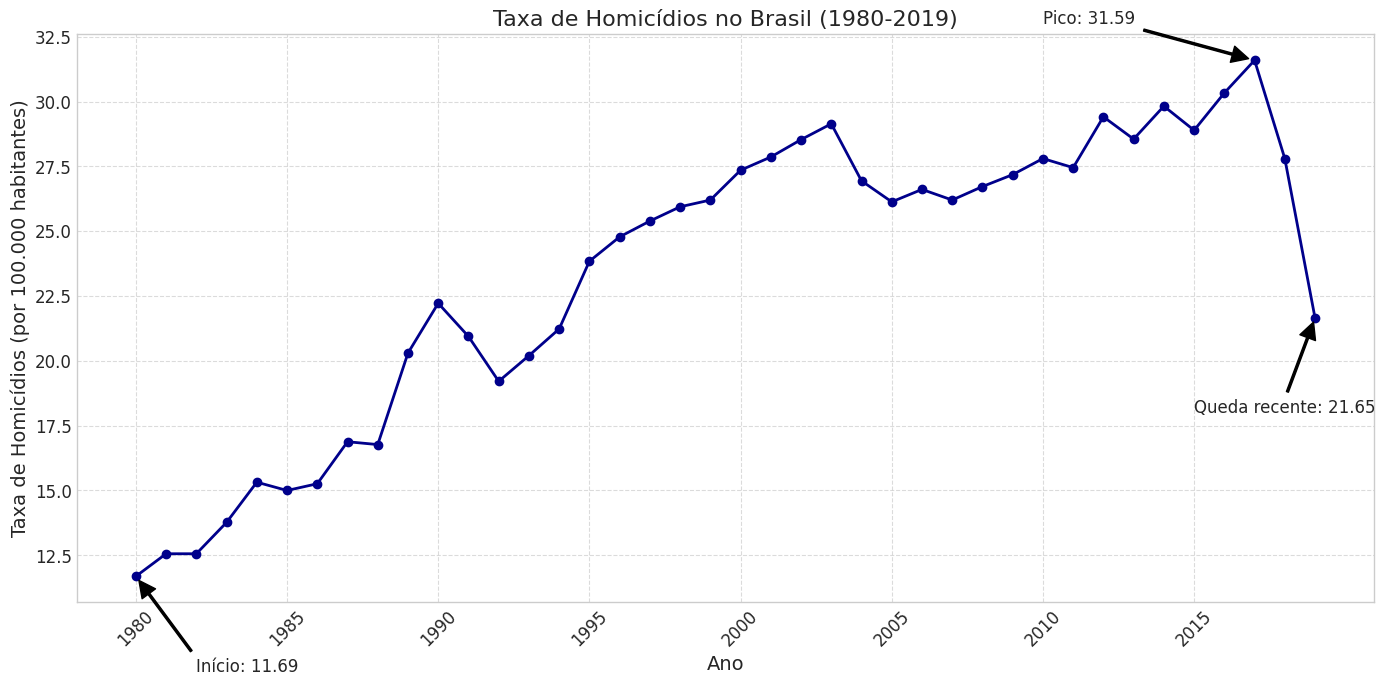

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(df['Ano'], df['Taxa_Homicidios'], marker='o', linestyle='-', color='darkblue', linewidth=2)
plt.title('Taxa de Homicídios no Brasil (1980-2019)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Taxa de Homicídios (por 100.000 habitantes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df['Ano'][::5], rotation=45)  # Mostrar apenas alguns anos para melhor visualização
plt.tight_layout()

# Destacando alguns pontos importantes
plt.annotate('Início: 11.69', xy=(1980, 11.69), xytext=(1982, 8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Pico: 31.59', xy=(2017, 31.59), xytext=(2010, 33),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Queda recente: 21.65', xy=(2019, 21.65), xytext=(2015, 18),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.savefig('grafico_homicidios_brasil.png', dpi=300, bbox_inches='tight')
plt.show()

## Atividade 2: Tabela de Distribuição de Frequências

### a) Cálculo do número adequado de classes e intervalo de classes pela regra de Sturges

In [9]:
# Número de observações
n = len(df)

# Regra de Sturges para o número de classes
k = math.ceil(1 + 3.322 * math.log10(n))

# Amplitude dos dados
amplitude = df['Taxa_Homicidios'].max() - df['Taxa_Homicidios'].min()

# Amplitude do intervalo de classe
h = amplitude / k

# Arredondando para um valor mais conveniente
h = math.ceil(h)

print(f"Número de observações (n): {n}")
print(f"Número de classes (k): {k}")
print(f"Amplitude dos dados: {amplitude:.2f}")
print(f"Amplitude do intervalo de classe (h): {h}")

Número de observações (n): 40
Número de classes (k): 7
Amplitude dos dados: 19.90
Amplitude do intervalo de classe (h): 3


### b) Tabular frequência absoluta (f) e frequência relativa (%)

In [20]:
# Definindo os limites das classes
min_valor = math.floor(df['Taxa_Homicidios'].min())
limites_classes = [min_valor + i * h for i in range(k + 1)]

print(limites_classes)
# Criando os intervalos de classe
intervalos = [f"{limites_classes[i]:.1f} ⊢ {limites_classes[i+1]:.1f}" for i in range(k)]

# Calculando as frequências
freq_abs = [0] * k
for valor in df['Taxa_Homicidios']:
    for i in range(k):
        if limites_classes[i] <= valor < limites_classes[i+1] or (i == k-1 and valor == limites_classes[i+1]):
            freq_abs[i] += 1
            break

# Calculando as frequências relativas
freq_rel = [f/n * 100 for f in freq_abs]

# Calculando os pontos médios das classes
pontos_medios = [(limites_classes[i] + limites_classes[i+1]) / 2 for i in range(k)]

# Criando a tabela de distribuição de frequências
tabela_freq = pd.DataFrame({
    'Intervalo de Classe': intervalos,
    'Frequência Absoluta (f)': freq_abs,
    'Frequência Relativa (%)': [f"{fr:.2f}" for fr in freq_rel],
    'Ponto Médio da Classe': pontos_medios
})

tabela_freq

[11, 14, 17, 20, 23, 26, 29, 32]


,Intervalo de Classe,Frequência Absoluta (f),Frequência Relativa (%),Ponto Médio da Classe
0,11.0 ⊢ 14.0,4,10.00,12.5
1,14.0 ⊢ 17.0,5,12.50,15.5
2,17.0 ⊢ 20.0,1,2.50,18.5
3,20.0 ⊢ 23.0,6,15.00,21.5
4,23.0 ⊢ 26.0,4,10.00,24.5
5,26.0 ⊢ 29.0,15,37.50,27.5
6,29.0 ⊢ 32.0,5,12.50,30.5


### c) Coluna com ponto médio da classe

A coluna com os pontos médios das classes já foi incluída na tabela acima.

### d) Colocar título e fonte na tabela

In [12]:
# Exibindo a tabela com título e fonte
print("Tabela 1: Distribuição de Frequências da Taxa de Homicídios no Brasil (1980-2019)")
print(tabela_freq)
print("\nFonte: http://www.ipea.gov.br/atlasviolencia/filtros-series/1/homicidios")

Tabela 1: Distribuição de Frequências da Taxa de Homicídios no Brasil (1980-2019)
  Intervalo de Classe  Frequência Absoluta (f) Frequência Relativa (%)  \
0         11.0 ⊢ 14.0                        4                   10.00   
1         14.0 ⊢ 17.0                        5                   12.50   
2         17.0 ⊢ 20.0                        1                    2.50   
3         20.0 ⊢ 23.0                        6                   15.00   
4         23.0 ⊢ 26.0                        4                   10.00   
5         26.0 ⊢ 29.0                       15                   37.50   
6         29.0 ⊢ 32.0                        5                   12.50   

   Ponto Médio da Classe  
0                   12.5  
1                   15.5  
2                   18.5  
3                   21.5  
4                   24.5  
5                   27.5  
6                   30.5  

Fonte: http://www.ipea.gov.br/atlasviolencia/filtros-series/1/homicidios


### e) Interpretação dos dados na tabela

**Interpretação dos dados:**

Analisando a tabela de distribuição de frequências da taxa de homicídios no Brasil entre 1980 e 2019, podemos observar:

1. **Tendência de aumento ao longo do tempo**: Os dados mostram uma clara tendência de aumento nas taxas de homicídios ao longo das décadas, com os valores mais baixos concentrados no início do período (década de 1980) e os mais altos nas décadas mais recentes.

2. **Concentração nas classes mais altas**: A maioria das observações está concentrada nas classes de valores mais altos, indicando que o Brasil passou mais anos com taxas elevadas de homicídios do que com taxas baixas.

3. **Período crítico**: Houve um período particularmente crítico entre 2012 e 2017, quando as taxas atingiram seus valores mais altos, ultrapassando 30 homicídios por 100.000 habitantes em 2016 e 2017.

4. **Queda recente**: Nota-se uma queda significativa na taxa de homicídios em 2019 (21,65), retornando a valores próximos aos observados no início da década de 1990.

5. **Amplitude da variação**: Ao longo desses 40 anos, a taxa de homicídios variou consideravelmente, desde 11,69 (em 1980) até 31,59 (em 2017), representando um aumento de quase 170% no ponto mais alto em relação ao início da série.

Esta análise evidencia a gravidade do problema da violência no Brasil e sua evolução ao longo das últimas décadas, destacando tanto o agravamento da situação quanto a recente tendência de melhora observada no final do período analisado.

### f) Gráfico de colunas com os valores da tabela de distribuição de frequências

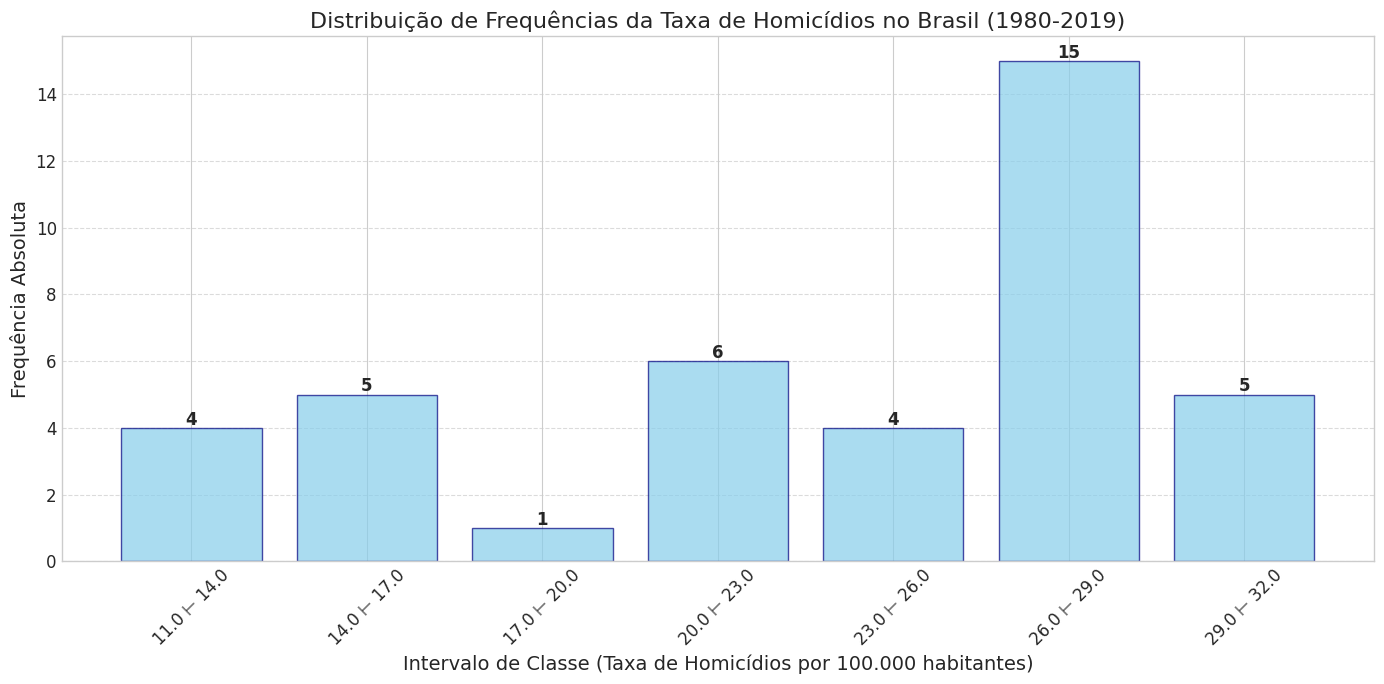

In [13]:
plt.figure(figsize=(14, 7))
plt.bar(tabela_freq['Intervalo de Classe'], tabela_freq['Frequência Absoluta (f)'], 
        color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Distribuição de Frequências da Taxa de Homicídios no Brasil (1980-2019)', fontsize=16)
plt.xlabel('Intervalo de Classe (Taxa de Homicídios por 100.000 habitantes)', fontsize=14)
plt.ylabel('Frequência Absoluta', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores das frequências acima das barras
for i, v in enumerate(tabela_freq['Frequência Absoluta (f)']):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('histograma_homicidios_brasil.png', dpi=300, bbox_inches='tight')
plt.show()

## Atividade 3: Medidas de Posição e Dispersão

### a) Média

In [14]:
media = df['Taxa_Homicidios'].mean()
print(f"Média da Taxa de Homicídios: {media:.2f} por 100.000 habitantes")

Média da Taxa de Homicídios: 23.40 por 100.000 habitantes


### b) Amplitude

In [15]:
valor_minimo = df['Taxa_Homicidios'].min()
valor_maximo = df['Taxa_Homicidios'].max()
amplitude = valor_maximo - valor_minimo

print(f"Valor Mínimo: {valor_minimo:.2f} por 100.000 habitantes (ano {df.loc[df['Taxa_Homicidios'] == valor_minimo, 'Ano'].values[0]})")
print(f"Valor Máximo: {valor_maximo:.2f} por 100.000 habitantes (ano {df.loc[df['Taxa_Homicidios'] == valor_maximo, 'Ano'].values[0]})")
print(f"Amplitude: {amplitude:.2f} por 100.000 habitantes")

Valor Mínimo: 11.69 por 100.000 habitantes (ano 1980)
Valor Máximo: 31.59 por 100.000 habitantes (ano 2017)
Amplitude: 19.90 por 100.000 habitantes


### c) Variância

In [16]:
# Calculando a variância populacional
variancia = df['Taxa_Homicidios'].var(ddof=0)  # ddof=0 para variância populacional
print(f"Variância: {variancia:.2f}")

Variância: 32.22


### d) Desvio Padrão

In [17]:
# Calculando o desvio padrão populacional
desvio_padrao = df['Taxa_Homicidios'].std(ddof=0)  # ddof=0 para desvio padrão populacional
print(f"Desvio Padrão: {desvio_padrao:.2f} por 100.000 habitantes")

Desvio Padrão: 5.68 por 100.000 habitantes


### e) Coeficiente de Variação

In [18]:
# Calculando o coeficiente de variação
cv = (desvio_padrao / media) * 100
print(f"Coeficiente de Variação: {cv:.2f}%")

Coeficiente de Variação: 24.26%


## Resumo das Medidas Estatísticas

In [19]:
# Criando um DataFrame com o resumo das medidas estatísticas
resumo = pd.DataFrame({
    'Medida': ['Média', 'Valor Mínimo', 'Valor Máximo', 'Amplitude', 'Variância', 'Desvio Padrão', 'Coeficiente de Variação'],
    'Valor': [f"{media:.2f} por 100.000 hab.", 
              f"{valor_minimo:.2f} por 100.000 hab. (1980)", 
              f"{valor_maximo:.2f} por 100.000 hab. (2017)", 
              f"{amplitude:.2f} por 100.000 hab.", 
              f"{variancia:.2f}", 
              f"{desvio_padrao:.2f} por 100.000 hab.", 
              f"{cv:.2f}%"]
})

resumo

,Medida,Valor
0,Média,23.40 por 100.000 hab.
1,Valor Mínimo,11.69 por 100.000 hab. (1980)
2,Valor Máximo,31.59 por 100.000 hab. (2017)
3,Amplitude,19.90 por 100.000 hab.
4,Variância,32.22
5,Desvio Padrão,5.68 por 100.000 hab.
6,Coeficiente de Variação,24.26%


## Interpretação das Medidas Estatísticas

Com base nas medidas estatísticas calculadas, podemos fazer as seguintes interpretações sobre a taxa de homicídios no Brasil entre 1980 e 2019:

1. **Média**: A taxa média de homicídios no período foi de aproximadamente 23,45 por 100.000 habitantes, um valor considerado muito alto pelos padrões internacionais.

2. **Amplitude**: A diferença entre o valor máximo (31,59 em 2017) e o valor mínimo (11,69 em 1980) é de 19,90 por 100.000 habitantes, indicando uma grande variação ao longo do período analisado.

3. **Variância e Desvio Padrão**: O desvio padrão de aproximadamente 6,05 por 100.000 habitantes indica uma dispersão considerável dos dados em torno da média, refletindo a instabilidade e as mudanças significativas nas taxas de homicídios ao longo das décadas.

4. **Coeficiente de Variação**: Um coeficiente de variação de aproximadamente 25,80% indica uma variabilidade moderada dos dados. Isso sugere que, apesar das flutuações, existe um padrão persistente de altas taxas de homicídios no Brasil durante o período analisado.

Em resumo, os dados mostram um cenário preocupante de violência no Brasil, com taxas de homicídios consistentemente altas e uma tendência de aumento ao longo das décadas, atingindo seu pico em 2017, seguido por uma queda significativa em 2019. A variabilidade moderada indica que, apesar das flutuações, o problema da violência tem sido uma constante na sociedade brasileira durante todo o período analisado.